In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set() # for plotting 
import warnings
warnings.filterwarnings("ignore") # To ignore warning messages while executing the code.
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline

# SK-learn libraries for learning.
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# SK-learn libraries for evaluation.
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
RANDOM_STATE = 0

In [2]:
data = pd.read_csv("../input/train.csv")
test_data = pd.read_csv("../input/test.csv")
print('data shape: ',data.shape)
print('test_data shape: ',test_data.shape)

data shape:  (200000, 202)
test_data shape:  (200000, 201)


In [3]:
# Find duplicate values
data.duplicated().sum()
# No duplicate values

0

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'target')]

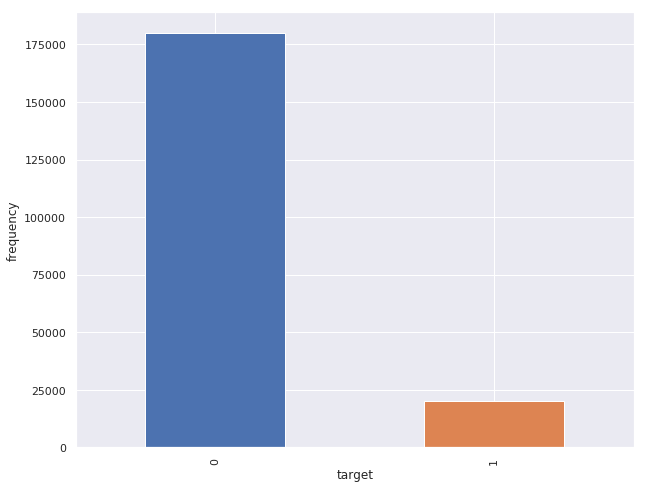

In [4]:
target = data['target']
fig_std=(10,8)
width = 0.4
target.value_counts().plot(kind='bar', figsize=fig_std).set(xlabel='target', ylabel='frequency') # To see the distribution of 'target' in the data

In [5]:
def data_Preprocess(df):
    df2 = df.copy()    
    df2["count_not0"] = (df != 0).sum(axis=1)
    df2['mean'] =  df.mean(axis=1)  
    df2['std'] =  df.std(axis=1) 
    df2['range'] = df.max(axis=1) - df.min(axis=1)
    df2['variance'] = df.var(axis=1)
    df2['min'] = df.min(axis=1)
    df2['max'] = df.max(axis=1) 
    df2['median'] = df.median(axis=1) 
    df2['skew'] = df.skew(axis=1)
    df2['kurt'] = df.kurt(axis=1) 
    return df2

In [6]:
X, y = data.drop(["ID_code", "target"], axis = 1), data["target"]
pipeline1 = Pipeline([('imputer', Imputer(strategy="median")),('std_scaler', StandardScaler())])


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
X_2 = data_Preprocess(X)
X_preproc = pipeline1.fit_transform(X_2)
print(X_preproc.shape)


(200000, 210)


In [8]:
train_data, dev_data, train_labels, dev_labels = train_test_split(X_preproc, y, test_size=0.2, random_state=42, stratify = y)
print('train_data shape: ',train_data.shape)
print('train_labels shape: ',train_labels.shape)
print('dev_data shape: ',dev_data.shape)
print('dev_labels shape: ',dev_labels.shape)

train_data shape:  (160000, 210)
train_labels shape:  (160000,)
dev_data shape:  (40000, 210)
dev_labels shape:  (40000,)


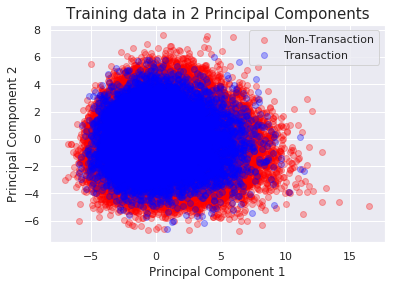

In [9]:
    pca = PCA(n_components = 2, random_state = RANDOM_STATE) # Assigning PCA class (with n_components = 2)to a variable
    train_data_2dim = pca.fit_transform(train_data) # Fit_transforming the train_data on PCA  
    plt.scatter(train_data_2dim[train_labels == 0, 0], train_data_2dim[train_labels == 0, 1], color = 'red', alpha = 0.3, label = 'Non-Transaction')
    plt.scatter(train_data_2dim[train_labels == 1, 0], train_data_2dim[train_labels == 1, 1], color = 'blue', alpha = 0.3, label = 'Transaction')
    plt.xlabel('Principal Component 1', fontsize = 12) # xlabel of the plot 
    plt.ylabel('Principal Component 2', fontsize = 12) # ylabel of the plot
    plt.legend(loc='best', shadow=False, scatterpoints=1) # legend location
    plt.title('Training data in 2 Principal Components', fontsize = 15) # title of the plot
    plt.show()  # plotting the figure 

In [10]:
#     RANDOM_STATE = 0
#     from sklearn.mixture import GaussianMixture
#     for n in range(2, 200, 10):
#         pca = PCA(n_components = n, random_state = RANDOM_STATE) # Assigning PCA class (with n_components = 2) to a variable
#         train_data_2dim = pca.fit_transform(train_data) # Fit_transforming the train_data to PCA 
#         positive_data_2dim = train_data_2dim[train_labels == 1]  # Positive labeled 'train_data_2dim' data
#         negative_data_2dim = train_data_2dim[train_labels == 0]  # Negative labeled 'train_data_2dim' data   
#         dev_data_2dim = pca.transform(dev_data)

#         for n_comp in range(2, 4):
#             # Fit a Gaussian Mixture Model with 4 components on positive labeled-data  
#             clf_positive = GaussianMixture(n_components = n_comp, covariance_type = 'full', random_state = RANDOM_STATE) # Assigning GMM Classifier class (with n_components = 4) to a variable
#             clf_positive.fit(positive_data_2dim) # Fitting the data to the GMM model
#             predict_pos = clf_positive.score_samples(dev_data_2dim) # Predicting the probability scores of the positive labeled data   

#             print('GMM Classifier Validation ', 'n', n,'n_comp', n_comp,'AUC =',  roc_auc_score(dev_labels, predict_pos))

In [11]:
    bnb = BernoulliNB(alpha=0.1) # Assigning KNeighborsClassifier Class to a variable
    bnb.fit(train_data, train_labels) # Fitting the train data to the classifier    
    print('Accuracy of Bernoulli NB Classifier on train data: {}'.format(bnb.score(train_data, train_labels)))
    print('Accuracy of Bernoulli NB Classifier on dev data: {}'.format(bnb.score(dev_data, dev_labels))) 
    pred_probas = bnb.predict_proba(dev_data)   
    print('Bernoulli NB Classifier Validation AUC =',roc_auc_score(dev_labels, pred_probas[:,1]))
   
#     bnb_clf_search = GridSearchCV(bnb, {'alpha': [0.1,0.01, 0.001, 0.00001]}) # Assiging the GridSearchCV Class (with 'k' values= 5,10,15,..95) 
#     bnb_clf_search.fit(train_data, train_labels) # Fitting the tain_data and train_labels to the GridSearch   
#     print("The best params for Bernoulli NB Classifier is: {} \n The best score is: {} \n\n".format(bnb_clf_search.best_params_, bnb_clf_search.best_score_) )

Accuracy of Bernoulli NB Classifier on train data: 0.90245625
Accuracy of Bernoulli NB Classifier on dev data: 0.902325
Bernoulli NB Classifier Validation AUC = 0.7847306339342752


In [12]:
    gnb = GaussianNB(var_smoothing = 0.001) # Assigning KNeighborsClassifier Class to a variable
    gnb.fit(train_data, train_labels) # Fitting the train data to the classifier        
    print('Accuracy of Gaussian NB Classifier on train data: {}'.format(gnb.score(train_data, train_labels)))
    print('Accuracy of Gaussian NB Classifier on dev data: {}'.format(gnb.score(dev_data, dev_labels))) 
    pred_probas = gnb.predict_proba(dev_data)    
    print('Gaussian NB Classifier Validation AUC =',roc_auc_score(dev_labels, pred_probas[:,1]))
   

Accuracy of Gaussian NB Classifier on train data: 0.9178625
Accuracy of Gaussian NB Classifier on dev data: 0.915925
Gaussian NB Classifier Validation AUC = 0.8805720425111796


In [13]:
    LogisticReg_clf =  LogisticRegression(C = 50, penalty='l2', solver='lbfgs') # Assigning LogisticRegression Class to a variable
    LogisticReg_clf.fit(train_data, train_labels) # Fitting the train_data to the classifier   
    print('Accuracy of Logistic Regression Classifier on train data:{}'.format(LogisticReg_clf.score(train_data, train_labels)))
    print('Accuracy of Logistic Regression Classifier on dev data:{}'.format(LogisticReg_clf.score(dev_data, dev_labels)))
    pred_probas = LogisticReg_clf.predict_proba(dev_data)    
    print('Logistic Regression Classifier Validation AUC =',roc_auc_score(dev_labels, pred_probas[:,1]))

Accuracy of Logistic Regression Classifier on train data:0.91628125
Accuracy of Logistic Regression Classifier on dev data:0.9147
Logistic Regression Classifier Validation AUC = 0.8662833898876933


In [14]:
import lightgbm as lgb
random_state = 2019

d_train = lgb.Dataset(train_data, label=train_labels)
d_dev = lgb.Dataset(dev_data, label=dev_labels)
params = {}
params['learning_rate'] = 0.2
params['boosting_type'] = 'goss'
params['objective'] = 'binary'
params['metric'] =  'auc'
params['is_training_metric']  = True
params['sub_feature'] = 0.1
params['num_leaves'] = 50
params['min_data'] = 1800
params['max_depth'] = -1
params['min_sum_hessian_in_leaf'] = 10.0


clf = lgb.train(params, d_train, 750, valid_sets = d_dev, valid_names='dev_data', early_stopping_rounds = 100, verbose_eval = 100 )
print('Best iteration: ', clf.best_iteration)

#Prediction
pred_probas_lgbm = clf.predict(dev_data,  num_iteration = clf.best_iteration)  
print('LightGBM  Classifier Validation AUC =',roc_auc_score(dev_labels, pred_probas_lgbm))

Training until validation scores don't improve for 100 rounds.
[100]	dev_data's auc: 0.878485
[200]	dev_data's auc: 0.887817
[300]	dev_data's auc: 0.889556
[400]	dev_data's auc: 0.889013
Early stopping, best iteration is:
[339]	dev_data's auc: 0.889697
Best iteration:  339
LightGBM  Classifier Validation AUC = 0.8896969018166534


In [15]:
# random_state = 2019
# param = {
# #     'bagging_freq': 5,
# #     'bagging_fraction': 0.4,
# #     'boost_from_average':'false',
# #     'boost': 'gbdt',
# #     'feature_fraction': 0.05,
# #     'learning_rate': 0.01,
# #     'max_depth': -1,  
# #     'metric':'auc',
# #     'min_data_in_leaf': 80,
# #     'min_sum_hessian_in_leaf': 10.0,
# #     'num_leaves': 13,
# #     'num_threads': 8,
# #     'tree_learner': 'serial',
# #     'objective': 'binary', 
# #     'verbosity': 1
#     "objective" : "binary",
#     "metric" : "auc",
#     "boosting": 'gbdt',
#     "max_depth" : -1,
#     "num_leaves" : 13,
#     "learning_rate" : 0.01,
#     "bagging_freq": 5,
#     "bagging_fraction" : 0.4,
#     "feature_fraction" : 0.05,
#     "min_data_in_leaf": 80,
#     "min_sum_heassian_in_leaf": 10,
#     "tree_learner": "serial",
#     "boost_from_average": "false",
#     #"lambda_l1" : 5,
#     #"lambda_l2" : 5,
#     "bagging_seed" : random_state,
#     "verbosity" : 1,
#     "seed": random_state
# }
# from sklearn.model_selection import StratifiedKFold
# folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
# oof = np.zeros(train_data.shape[0])
# predictions = np.zeros(dev_data.shape[0])
# #feature_importance_df = pd.DataFrame()

# for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_data, train_labels)):
#     print("Fold {}".format(fold_))
#     trn_data = lgb.Dataset(train_data[trn_idx], label=train_labels[trn_idx])
#     val_data = lgb.Dataset(train_data[val_idx], label=train_labels[val_idx])

#     num_round = 1000000
#     clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
#     oof[val_idx] = clf.predict(train_data[val_idx], num_iteration=clf.best_iteration)
    
# #     fold_importance_df = pd.DataFrame()
# #     fold_importance_df["Feature"] = features
# #     fold_importance_df["importance"] = clf.feature_importance()
# #     fold_importance_df["fold"] = fold_ + 1
# #     feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
#     predictions += clf.predict(dev_data, num_iteration=clf.best_iteration) / folds.n_splits

# print("CV score: {:<8.5f}".format(roc_auc_score(dev_labels, predictions)))
# print('LightGBM  Classifier Validation AUC =',roc_auc_score(dev_labels, predictions))

In [16]:
def EnsemblerPredict_Proba(Estimators, data):
    Predict_Proba = []
    for i in range(data.shape[0]):      
        best_p = 0
        for Estimator in Estimators:            
            p = Estimator.predict_proba(data[i].reshape(1,-1))[:,1]          
            if p >= best_p: best_p = p
        Predict_Proba.append(best_p)       
    Predict_Proba = np.array(Predict_Proba).reshape(len(Predict_Proba))  
    return np.array(Predict_Proba)

In [17]:
def EnsemblerPredict_Proba_Avg(Estimators, data):
    Predict_Proba = []
    for i in range(data.shape[0]):      
        p = 0
        for Estimator in Estimators:            
            p += Estimator.predict_proba(data[i].reshape(1,-1))[:,1]          
        p = p/len(Estimators)   
        Predict_Proba.append(p) 
    Predict_Proba = np.array(Predict_Proba).reshape(len(Predict_Proba))   
    return np.array(Predict_Proba)

In [18]:
def EnsemblerPredict_Proba_Min(Estimators, data):
    Predict_Proba = []
    for i in range(data.shape[0]):      
        best_p = 2
        for Estimator in Estimators:            
            p = Estimator.predict_proba(data[i].reshape(1,-1))[:,1]          
            if p <= best_p: best_p = p
        Predict_Proba.append(best_p)       
    Predict_Proba = np.array(Predict_Proba).reshape(len(Predict_Proba))  
    return np.array(Predict_Proba)

In [19]:
Estimators = [bnb, gnb, LogisticReg_clf]
EnsemblerPredict_dev = EnsemblerPredict_Proba_Avg(Estimators, dev_data)
print(EnsemblerPredict_dev[:10])
print('Ensembler Predict Classifier Validation AUC =',roc_auc_score(dev_labels, EnsemblerPredict_dev))


[0.00367077 0.05695015 0.01955925 0.02153261 0.03112424 0.07129356
 0.03969612 0.13353074 0.00695276 0.02626534]
Ensembler Predict Classifier Validation AUC = 0.8672148291339301


In [20]:
def blender_lgbm_Ensembler_Max(lgbm, ensembler):
    predict = np.zeros(lgbm.shape)
    for i in range(lgbm.shape[0]):
        if lgbm[i] >= ensembler[i]:
            predict[i] = lgbm[i]
        else:
            predict[i] = ensembler[i]            
    return predict        

In [21]:
def blender_lgbm_Ensembler_Min(lgbm, ensembler):
    predict = np.zeros(lgbm.shape)
    for i in range(lgbm.shape[0]):
        if lgbm[i] <= ensembler[i]:
            predict[i] = lgbm[i]
        else:
            predict[i] = ensembler[i]            
    return predict  

In [22]:
def blender_lgbm_Ensembler_Avg(lgbm, ensembler):
    predict = np.zeros(lgbm.shape)
    for i in range(lgbm.shape[0]):        
            predict[i] = (lgbm[i] + ensembler[i])* 0.5  
    return predict  

In [23]:
predict_blender_Max = blender_lgbm_Ensembler_Max(pred_probas_lgbm, EnsemblerPredict_dev)
print(predict_blender_Max[:20])
print('Blender Max Validation AUC =',roc_auc_score(dev_labels, predict_blender_Max))

[0.00367077 0.07449547 0.01955925 0.02153261 0.0316558  0.07129356
 0.03969612 0.13353074 0.00695276 0.02626534 0.07110783 0.00566004
 0.07255038 0.00699029 0.73392337 0.07174678 0.02859513 0.06330315
 0.03550483 0.06272907]
Blender Max Validation AUC = 0.8829151974977807


In [24]:
predict_blender_Min = blender_lgbm_Ensembler_Min(pred_probas_lgbm, EnsemblerPredict_dev)
print(predict_blender_Min[:20])
print('Blender Min Validation AUC =',roc_auc_score(dev_labels, predict_blender_Min))

[0.00218685 0.05695015 0.00257372 0.00763891 0.03112424 0.01904182
 0.02364903 0.09692432 0.00447899 0.01370951 0.0234225  0.00071273
 0.06494666 0.00096771 0.44052593 0.0124822  0.00263366 0.05359139
 0.00922245 0.02223469]
Blender Min Validation AUC = 0.888243689833213


In [25]:
predict_blender_Avg = blender_lgbm_Ensembler_Avg(pred_probas_lgbm, EnsemblerPredict_dev)
print(predict_blender_Avg[:20])
print('Blender Min Validation AUC =',roc_auc_score(dev_labels, predict_blender_Avg))

[0.00292881 0.06572281 0.01106648 0.01458576 0.03139002 0.04516769
 0.03167258 0.11522753 0.00571587 0.01998742 0.04726516 0.00318638
 0.06874852 0.003979   0.58722465 0.04211449 0.0156144  0.05844727
 0.02236364 0.04248188]
Blender Min Validation AUC = 0.888193095113648


In [26]:
test_data_preproc = test_data.drop(["ID_code"], axis = 1)
test_data_preproc = data_Preprocess(test_data_preproc)
test_data_preproc = pipeline1.transform(test_data_preproc)
pred_probas =  clf.predict(test_data_preproc,  num_iteration = clf.best_iteration) 
# EnsemblerPredict_test = EnsemblerPredict_Proba_Avg(Estimators, test_data_preproc)
print(pred_probas[:10])

[0.13693477 0.36210022 0.18602291 0.07375768 0.03731066 0.00134239
 0.00458505 0.30606199 0.00179802 0.00394884]


In [27]:
submission = pd.DataFrame({'ID_code': test_data.ID_code, 'target': pred_probas})
submission.to_csv('submission.csv', index=False)

In [28]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.optimizers import RMSprop
# from keras.optimizers import SGD
# from keras.optimizers import Adam

# batch_size = 128
# num_classes = 2
# epochs = 1

# train_labels_reshaped = np.array(train_labels).reshape(len(train_labels),1)
# dev_labels_reshaped = np.array(dev_labels).reshape(len(dev_labels),1)
# print(train_labels.shape)

# train_labels_reshaped = keras.utils.to_categorical(train_labels_reshaped, num_classes=num_classes)
# dev_labels_reshaped = keras.utils.to_categorical(dev_labels_reshaped, num_classes=num_classes)
# model = Sequential()
# model.add(Dense(500, activation='relu', kernel_initializer='normal', input_shape=(train_data.shape[1],)))
# model.add(Dense(500, activation='relu'))
# model.add(Dense(2, activation='sigmoid'))

# # model = Sequential()
# # model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(30, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# # # Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# model.summary()


# history = model.fit(train_data, train_labels_reshaped,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=(dev_data, dev_labels_reshaped))
# score = model.evaluate(dev_data, dev_labels_reshaped, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])


